<a href="https://colab.research.google.com/github/pritika0709/PRITIKA.CU/blob/main/Bank_Marketing_Inspection_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [4]:

import pandas as pd

# Load the dataset
df = pd.read_csv('bankmarketing.csv')

# Display the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:

df.isnull().sum()



,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [7]:

df.describe()



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


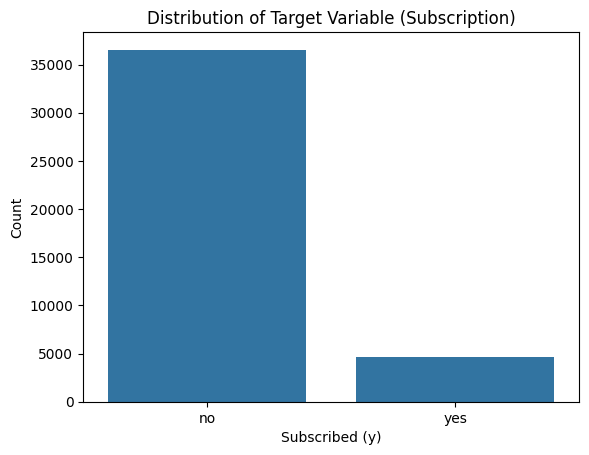

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.title("Distribution of Target Variable (Subscription)")
plt.xlabel("Subscribed (y)")
plt.ylabel("Count")
plt.show()

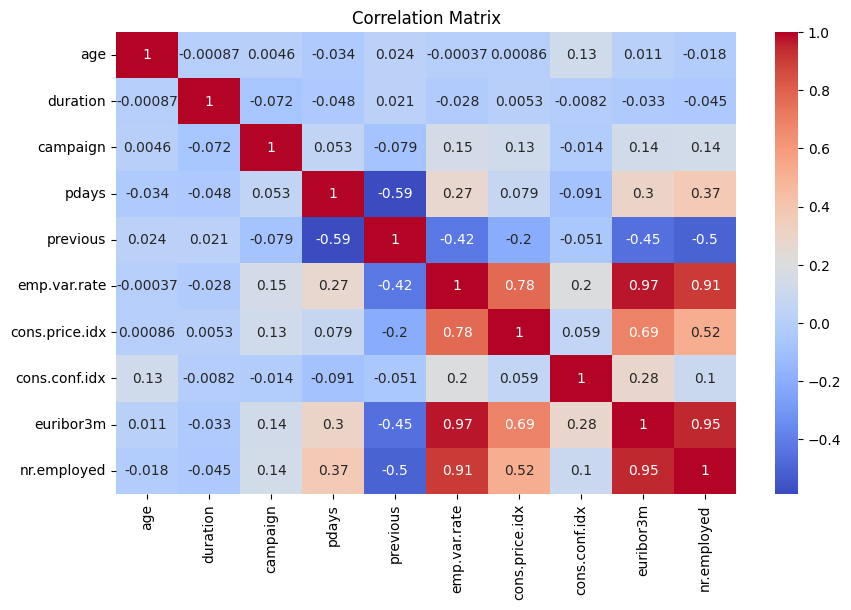

In [10]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()




## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.


In [3]:
'bankmarketing.csv'

'bankmarketing.csv'

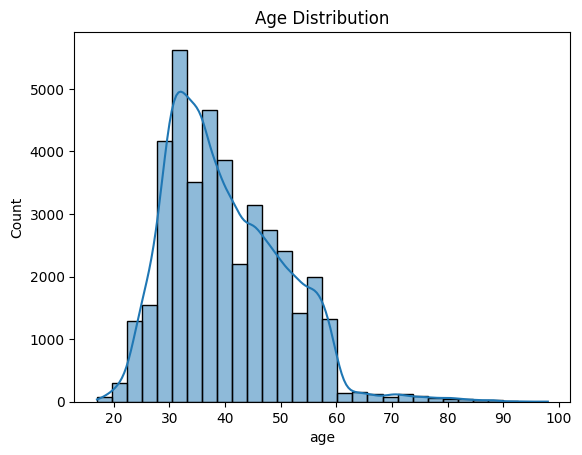

In [11]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [25]:
df = pd.read_csv('bankmarketing.csv')

In [26]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [27]:
df['y'] = df['y'].astype(str).str.strip()
df['y'] = df['y'].replace({'no': 0, 'yes': 1})

/tmp/ipython-input-2918448258.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'no': 0, 'yes': 1})


In [28]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9104151493080845


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

